# Fundamentals of Data Analysis Winter 2023 Project

**Author: Nur Bujang**

project.ipynb
***

# Project Instruction:

> The project is to create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.(1)

> In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

> Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

> Select, demonstrate, and explain the most appropriate plot(s) for each variable.

> The notebook should follow a cohesive narrative about the data set.

Deadline is Friday 22 December 2023.

# Project Title: Analysis Of The Iris Flower Dataset

## Abstract

The goal of this project is to investigate the variables and data points within the Iris flower dataset. The Iris dataset contains 5 columns and 150 rows, consisting of 3 classes species with 50 lines each, with no missing values. Four attributes ( length and width of petal of sepal) were used to morphologically determine whether an Iris is one of three species: *setosa*, *versicolor* or *virginica*. 


The analysis done are

Results show that 

This data can be used to develop Interactive Identification Keys for future botanists and researchers, as well as species determination using pattern recognition in Machine Learning.

## 1.0 Background

The problem of species differentiation within the genus Iris has long been discussed, especially between *I. versicolor* and *I. virginica* (Anderson, 1928, 1936). Molecular studies have been done to determine chromosomal numbers of different native and introduced Iris species as early as 1934 (Randolph, 1934). 

The Iris dataset was introduced by the British biologist and statistician Ronald A. Fisher in his paper to describe linear discriminant analysis published in 1936 (Wikipedia Contributors, 2019). The flowers were collected from  Gaspé Peninsula in Canada (Anderson, 1935) and multiple locatins from Central to Northern USA (Anderson, 1928, 1936). The dataset became famous because it provides a well-defined problem in the field of pattern recognition and machine learning and has become a reliable benchmark for testing and comparing different machine learning algorithms, particularly those involved in classification tasks (Lundy, 2023).

In this genus, the color attribute is probably unreliable because of color polymorphism within the species or population. When coupled with phylogenetic studies which identifies the species and their closely-related species and common ancestors, it would become a powerful tool for taxonomists and researchers.

## 2.0 Methods and Implementation

To begin, Python libraries numpy for computational operations and pandas for data loading and processing were imported. Other libraries were added and  described as the project progressed.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns
import matplotlib.pyplot as plt 

from distfit import distfit

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

The Iris dataset (iris.csv) was imported from the repository according to Pandas pydata read_csv, (n.d.)  and df.head (Pandas pydata df.head, n.d.) was performed to show the default first few lines of the dataframe.

In [2]:
df = pd.read_csv('iris.csv') # df contains iris.csv
df.head()  # default is 5

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


df.info was performed to provide a quick lookover of the dataset (The Pandas Development Team, 2022). 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



The dataset iris.data contains 5 columns and 150 lines (replicates), consisting of 3 classes of 50 instances each, without missing values. The four attributes of a particular external flower structure (the length (in cm) and width (in cm) of the sepal and petal) are the independent variables used to determine or identify whether an Iris flower is one of three classes (Iris setosa, I. versicolor or I. virginica). in the dependent class column.

### 2.1 Classification of Variables

> In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

#### Columns 'sepal_length', 'sepal_width', 'petal_length' and 'petal_width'

The four independent columns are 64-bit floating-point numbers. They are continuous data types, which is a type of quantitative data (Pramoditha, 2020). These values can take an infinite value within a certain range. These are measured in ratio scale, which has equal intervals between values and has a true zero point (web.pdx.edu, n.d.). Probability distributions only apply on these numerical columns sepal_length, sepal_width, petal_length and petal_width. 


#### Column 'class'

From the output, the column class is an object. Objects are strings, which is is a more specialized text data type compared to the generic object data type. Strings can be considered a form of categorical data type, particularly when they represent discrete categories or labels (Konkiewicz, 2020). In this instance, it is a categorical data type, which is a type of qualitative data, meaning it can only fall into a select group (Dettori and Norvell, 2018). A nominal categorical variable is a type of categorical variable that represents categories or labels without specific order or ranking among them (Statistics Solutions, 2017).Columns class is a nominal categorical variable, so no probability distributions are applicable. 

df.describe (Pandas.pydata.describe, n.d.) was then executed to generate basic statistical information of each column in the dataset, such as the mean and standard deviation.

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


output:




> Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

> Select, demonstrate, and explain the most appropriate plot(s) for each variable.

To look at the distribution, matplotlib and seaborn were imported to visualise plots for each variable. Multiple subplots in one output were generated according to Bruno (2020) and Matplotlib.pyplot.subplots (n.d.). To adjust the spacing between subplots, fig.tight_layout was used according to GeeksforGeeks spacing (2020).

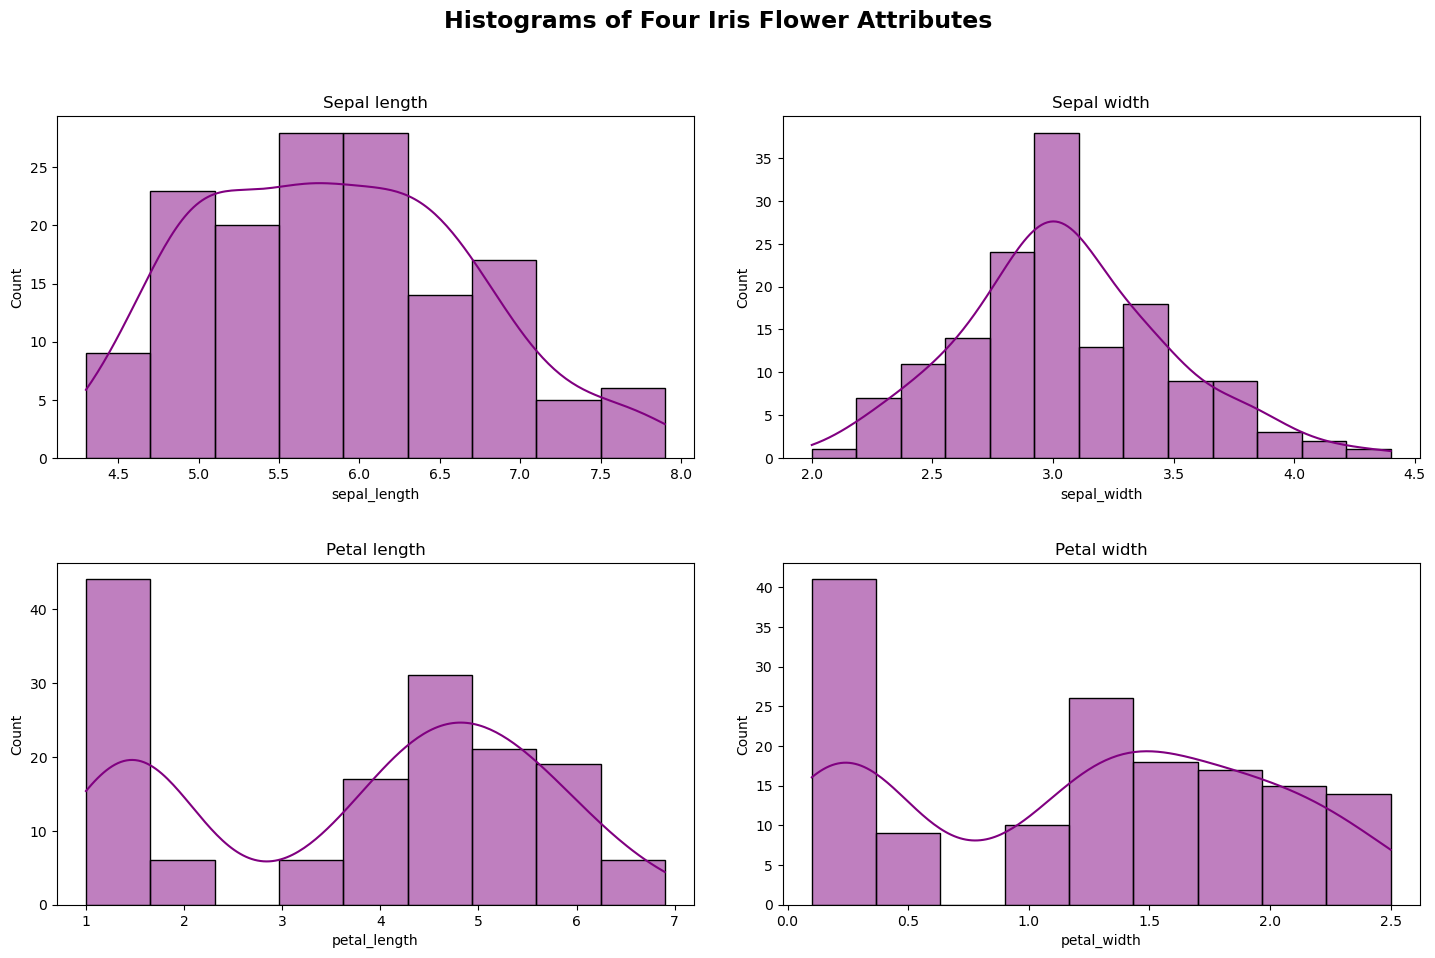

In [5]:
# Histograms for independent variables: 

fig, axs = plt.subplots(2, 2, figsize=[15, 10])
fig.suptitle('Histograms of Four Iris Flower Attributes', fontweight='bold', size=17)

sns.histplot(df['sepal_length'], 
             kde=True, color='purple', label='Data', 
             ax=axs[0,0]
             )
axs[0,0].set_title('Sepal length')

sns.histplot(df['sepal_width'], 
             kde=True, color='purple', label='Data', 
             ax=axs[0,1]
             )
axs[0,1].set_title('Sepal width')

sns.histplot(df['petal_length'], 
             kde=True, color='purple', label='Data', 
             ax=axs[1,0]
             )
axs[1,0].set_title('Petal length')

sns.histplot(df['petal_width'], 
             kde=True, color='purple', label='Data', 
             ax=axs[1,1]
             )
axs[1,1].set_title('Petal width')

fig.tight_layout(pad=3.0)
 
plt.show();

Following that, Python package distfit (Taskesen, 2020a, 2020b) was used for hypothesis testing and to find the best probability distribution to model each variable, as shown in Malloy (2023), Mayo (2022) and Raoniar (2022).

In [10]:
dists = {} # create a list of columns

for c in df.columns[:-1]: # omit the last column(class)
    #print(c)
    dists[c] = {'fit' : distfit() } # Initialize distfit
    print(c)

# Fit distributions on empirical temp, after dropping missing values
    dists[c]['fit'].fit_transform(df[c].dropna().values)

# Predict the probability of the response variables
    dists[c]['fit'].predict(df[c].dropna().values) 

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0442928] [loc=5.843 scale=0.825]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.324604] [loc=4.300 scale=1.543]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.324604] [loc=-67108859.700 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.0707607] [loc=5.864 scale=0.760]


sepal_length


[distfit] >INFO> [t         ] [0.20 sec] [RSS: 0.0442963] [loc=5.843 scale=0.825]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.0404159] [loc=5.512 scale=0.758]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 0.0433697] [loc=3.354 scale=0.286]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0428199] [loc=1.491 scale=4.274]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 0.0336647] [loc=4.250 scale=3.979]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.173333] [loc=4.300 scale=3.600]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.0442676] [loc=-149.800 scale=23.349]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.410909] [loc=3.054 scale=0.432]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 2.40412] [loc=2.000 scale=1.054]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 2.40412] [loc=-134217726.000 scale=134217728.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.455428] [loc=3.055 scale=0.355]
[distfit] >INFO> [t         ] [0.09 

sepal_width


[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 0.370416] [loc=0.228 scale=283000.967]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1.72812] [loc=2.000 scale=2.400]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.416172] [loc=-119.841 scale=16.834]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.220907] [loc=3.759 scale=1.759]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.188056] [loc=1.000 scale=2.759]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.188056] [loc=-536870911.000 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.0824534] [loc=3.151 scale=1.940]


petal_length


[distfit] >INFO> [t         ] [0.19 sec] [RSS: 0.220907] [loc=3.759 scale=1.759]
[distfit] >INFO> [genextreme] [0.02 sec] [RSS: 0.19216] [loc=3.332 scale=1.894]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.223404] [loc=-25.310 scale=0.110]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.220908] [loc=-126459.708 scale=126463.466]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 0.205905] [loc=0.394 scale=6.506]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.165056] [loc=1.000 scale=5.900]
[distfit] >INFO> [loggamma  ] [0.00 sec] [RSS: 0.190595] [loc=4.709 scale=1.413]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.976261] [loc=1.199 scale=0.761]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.805438] [loc=0.100 scale=1.099]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.805438] [loc=-58720255.900 scale=58720256.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 1.07404] [loc=1.346 scale=0.698]


petal_width


[distfit] >INFO> [t         ] [0.22 sec] [RSS: 0.97626] [loc=1.199 scale=0.761]
[distfit] >INFO> [genextreme] [0.02 sec] [RSS: 0.906355] [loc=1.008 scale=0.819]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.982388] [loc=-18.805 scale=0.029]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.976267] [loc=-32794.507 scale=32795.706]
[distfit] >INFO> [beta      ] [0.07 sec] [RSS: 0.698514] [loc=0.100 scale=2.487]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.67] [loc=0.100 scale=2.400]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 0.954374] [loc=-4.343 scale=2.412]


One option is to pick the lowest RSS value from the output above to select the best-fitting probability distribution for each attribute. To better visualize the data, Distribution Plots were generated using Matplotlib (Matplotlib.pyplot.subplots, n.d.). 

In the Distribution Plots, fig.tight_layout was used to adjust spacing between the subplots according to GeeksforGeeks spacing (2020. )Spacing between subplots and title (y=1.01) were adjusted according to Ceylan (2018).

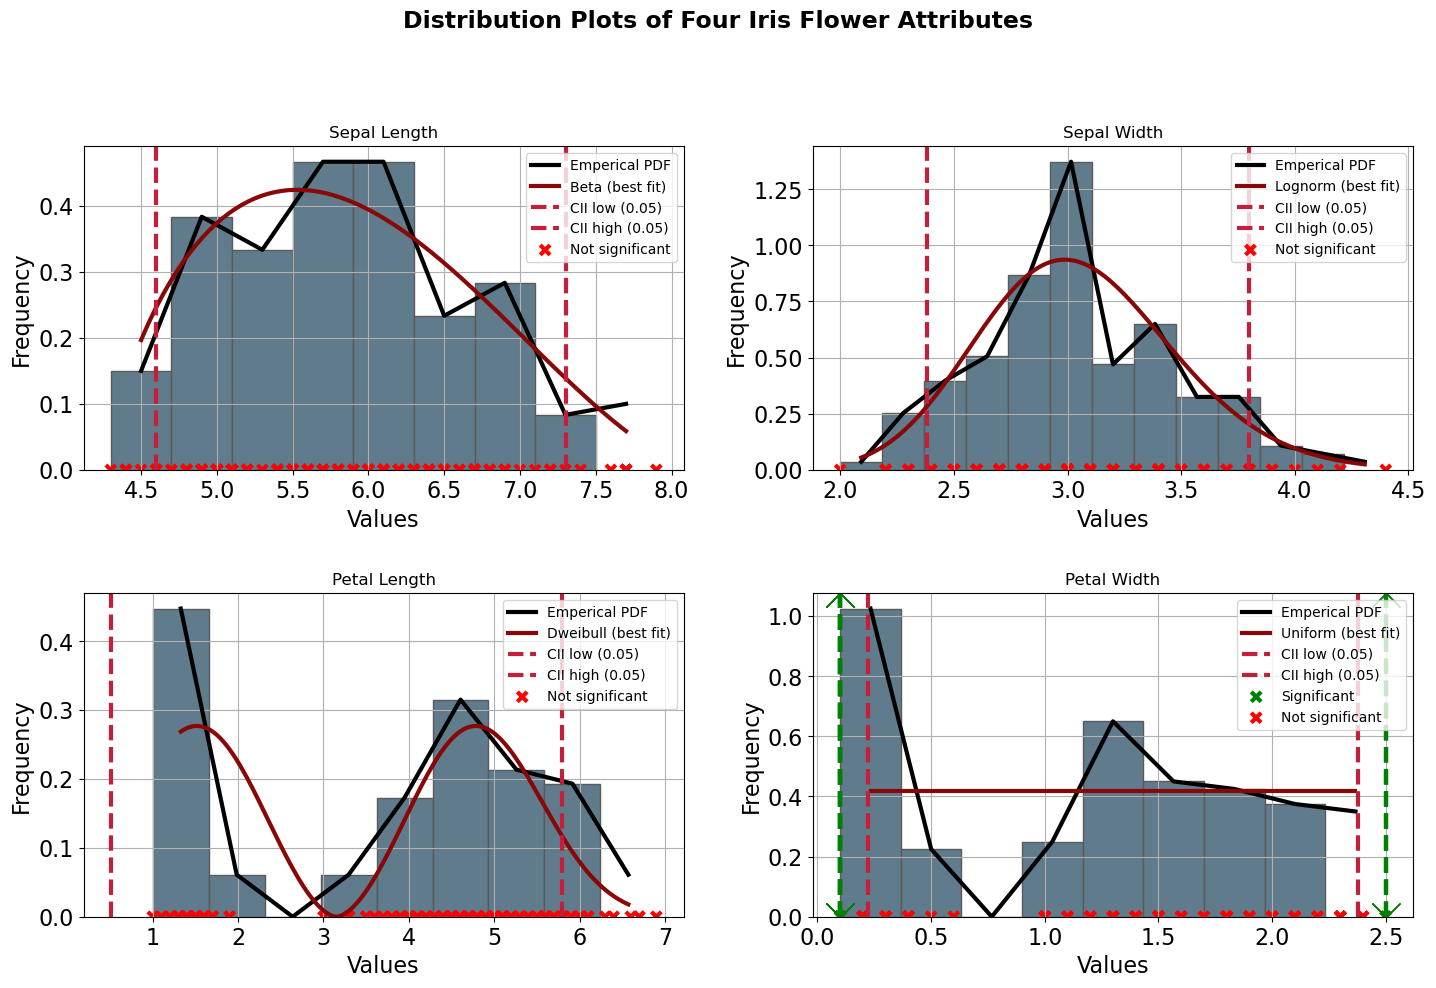

In [12]:
# create multiple subplots with 2 rows and 2 columns

fig, axs = plt.subplots(2, 2, figsize=[15, 10])

fig.suptitle('Distribution Plots of Four Iris Flower Attributes', 
             y=1.01, fontweight='bold', size=17)

dists['sepal_length']['fit'].plot(ax=axs[0,0])
axs[0,0].set_title('Sepal Length')

dists['sepal_width']['fit'].plot(ax=axs[0,1])
axs[0,1].set_title('Sepal Width')

dists['petal_length']['fit'].plot(ax=axs[1,0])
axs[1,0].set_title('Petal Length')

dists['petal_width']['fit'].plot(ax=axs[1,1])
axs[1,1].set_title('Petal Width')

fig.tight_layout(pad=3.0)
 
plt.show();

The probability distribution for all five columns are summarized in Table 1.

#### Table 1: Probability Distribution for Four Numerical Variables 

| **Column**| **Probability Distribution** | 
| :-------: | :------: |
| sepal_length |  Beta  |
| sepal_width |  Log Normal |
| petal_length |   Double Weibull  |
| petal_width |  Uniform |

For the class column, seaborn countplots were generated according to Waskom (2012).

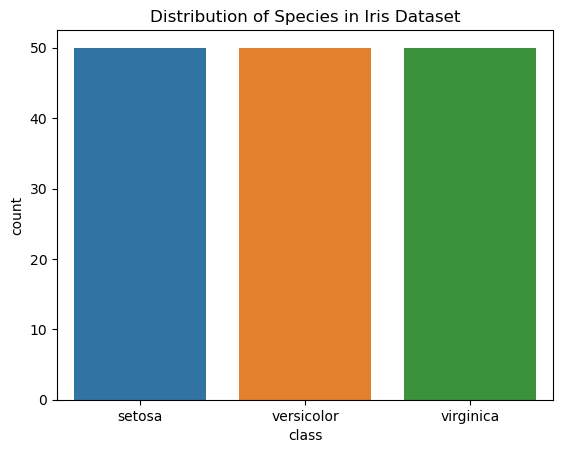

In [19]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Species in Iris Dataset')
plt.show()

> Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

> Select, demonstrate, and explain the most appropriate plot(s) for each variable.


Beta Distribution

Beta distribution is the best fit for column sepal_length. 

what

application

formula

Log Normal

The best-fitting distribution for column sepal_width is Log Normal.

what

application

formula


Double Weibull

Beta distribution is the best fit for column petal_length. 

what

application

formula

Uniform

The best-fitting distribution for column sepal_width is Log Normal.

what

application

formula



## 3.0 Analysis

## 4.0 Conclusion

## References




***

## End